In [3]:
# coding=utf-8
import pandas as pd
import csv  # Import csv
import tweepy
import re
import string
import nltk
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
pd.set_option('display.max_colwidth',1000)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [7]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

import codecs
df = pd.read_csv('PreprocessedData.csv', header = None, encoding='utf-8', engine='python')
df.columns = ['ID','User','CREATED_AT','LABEL','stemming_words']
df = df.iloc[1: , :] # start from first column
df.head()

,ID,User,CREATED_AT,LABEL,stemming_words
1,2,1.41E+18,7/11/2021 9:59,Crime,අන්තර්ජාල ඔස්සේ අළෙවි වූ බාලවයස්කාර දැරිය අපයෝජන කිරීමේ සිද්ධිය සම්බන්ධ පොලිස් ක්රීඩා කොට්ඨාසයේ උප පොලිස් පරීක්ෂකවරයකු රජයේ ප්රධාන පෙළේ බැංකුවක හිටපු කළමණාකාරවරයකු ළමා කාන්තා කාර්යාංශ අද අත්අඩංගුව ගනු ලැබ තිබේ
2,4,1.41E+18,7/11/2021 9:14,Sport,ක්රීඩා අමාත්යාංශයෙන් බොක්සිං මිලියන
3,6,1.41E+18,7/11/2021 9:13,Sport,මේසපන්දුව දියුණු කරන්නට ක්රීඩා අමාත්යංශය ගිවිසුම්ගත වෙයි
4,8,1.41E+18,7/11/2021 6:39,Sport,පී සරවනමුත්තු කුසලා අන්තර්සමාජ පළමු ඛාණ්ඩ ශූරයන් වූ සිංහල ක්රීඩා සමාජ පිල ශ්රී ලංකව විවිධ අවධි වල නියෝජන කල ක්රීඩකයන් රැසක් සිටින එවක ශ්රී ලංකා නායක අර්ජුන රණතුංග සාමාන් ක්රීඩකයෙක් වසරේදී ක්රීඩා සමාජයට ක්රීඩා කර ඇත
5,10,1.41E+18,7/11/2021 6:11,Politics,ක්රීඩා ඇමැතිතුමා තවම හරි අය හරි තැන්වල දාගෙන සුනිල ගුණවර්ධන


In [9]:
df.loc[df['LABEL']=='Crime',"LABEL"] = 0
df.loc[df['LABEL']=='Entertainment',"LABEL"] = 1
df.loc[df['LABEL']=='Politics',"LABEL"] = 3
df.loc[df['LABEL']=='Sport',"LABEL"] = 4
df.loc[df['LABEL']=='Other',"LABEL"] = 5

In [13]:
import matplotlib.pyplot as plt
classes = df.LABEL.unique()
counts = []

for i in classes:
    count = len(df[df.LABEL==i])
    counts.append(count)

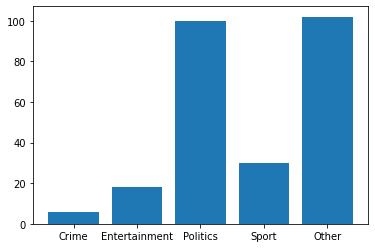

In [17]:
plt.bar(['Crime','Entertainment','Politics','Sport','Other'], counts)
plt.show()

In [18]:
########## vectorizer ######################

In [57]:
x_train, x_test, y_train, y_test = train_test_split(df['stemming_words'],df['LABEL'],random_state=50)

In [58]:
print(x_train)

119                                                                                                                                                                                                                මේව කරගන්න අසද මේක දේශපාලන මගුලක් නෙමෙයි කියවන්න
78                                                                                                                                                                                         කාටවත් බයියා කියලා කියන්නේ මොකට බයි ටොයි ජෙප්පෝ හැමෝම දේශපාලන වහල්ලුමොකද
121                                                                                                                                                                       අපි ඉපදුන රටේ මේකෙ ඉන්න දේශපාලන හිඟන්නො තමා අපට වඳයක් උනේ මුන්ට ඕන මේකෙ තියන හැම දෙයක්ම ස
101                                                                                                                                            කැමැති දේශපාලන පක්ශෙට බනිනකොට රිදෙන වගේද බනින එකාට ගහන්න හිතෙන තමන්ගේ පක්ශේ ක

In [59]:
print(y_train)

119    5
78     5
121    3
101    5
84     5
      ..
34     5
110    5
140    3
225    3
177    1
Name: LABEL, Length: 192, dtype: object


In [60]:
####### Bag of word ###########

In [61]:
vect = CountVectorizer().fit(x_train)

In [63]:
vect.get_feature_names()

['අක',
 'අකල',
 'අග',
 'අගම',
 'අගය',
 'අටර',
 'අඩ',
 'අඩස',
 'අත',
 'අතක',
 'අතට',
 'අතර',
 'අතරය',
 'අද',
 'අදහස',
 'අධ',
 'අන',
 'අනත',
 'අප',
 'අපග',
 'අපට',
 'අපමන',
 'අපය',
 'අබ',
 'අභ',
 'අම',
 'අමතක',
 'අමතන',
 'අමතර',
 'අමන',
 'අය',
 'අයග',
 'අයත',
 'අයවල',
 'අර',
 'අරග',
 'අරම',
 'අරල',
 'අව',
 'අවක',
 'අවද',
 'අවධ',
 'අවබ',
 'අවම',
 'අවශ',
 'අවස',
 'අවසර',
 'අවහ',
 'අශ',
 'අස',
 'අසද',
 'අසම',
 'අසමසම',
 'අසල',
 'අහ',
 'අහමඩ',
 'අළ',
 'ආගම',
 'ආගමන',
 'ආච',
 'ආණ',
 'ආද',
 'ආදරණ',
 'ආදරය',
 'ආය',
 'ආයතන',
 'ආයතනය',
 'ආර',
 'ආරක',
 'ආරම',
 'ආශ',
 'ආස',
 'ආහ',
 'ඇටය',
 'ඇත',
 'ඇතක',
 'ඇද',
 'ඇන',
 'ඇප',
 'ඇම',
 'ඇමත',
 'ඇමර',
 'ඇය',
 'ඇරඹ',
 'ඇරල',
 'ඇල',
 'ඇව',
 'ඇස',
 'ඇහන',
 'ඈන',
 'ඉක',
 'ඉග',
 'ඉට',
 'ඉඩ',
 'ඉත',
 'ඉද',
 'ඉදන',
 'ඉන',
 'ඉඳල',
 'ඉපද',
 'ඉර',
 'ඉල',
 'ඉලක',
 'ඉවත',
 'ඉවර',
 'ඉවරය',
 'ඉවසල',
 'ඉෂ',
 'ඉහල',
 'ඉහලම',
 'ඉහළ',
 'ඊට',
 'ඊය',
 'ඊර',
 'ඊලග',
 'ඊළඟ',
 'උගත',
 'උගසට',
 'උඩ',
 'උත',
 'උද',
 'උන',
 'උනත',
 'උප',
 'උපක',
 'උපද',
 'උබත',
 'උම',
 'උර',
 'උ

In [65]:
len(vect.get_feature_names())

688

In [66]:
x_train_vectorized = vect.transform(x_train)

In [67]:
x_train_vectorized

<192x688 sparse matrix of type '<class 'numpy.int64'>'
	with 2681 stored elements in Compressed Sparse Row format>

In [68]:
print(x_train_vectorized)

  (0, 50)	1
  (0, 200)	1
  (0, 439)	1
  (0, 486)	1
  (0, 538)	1
  (0, 544)	1
  (0, 605)	1
  (1, 180)	1
  (1, 187)	1
  (1, 284)	1
  (1, 419)	2
  (1, 476)	1
  (1, 484)	1
  (1, 544)	1
  (1, 599)	1
  (1, 605)	1
  (2, 18)	1
  (2, 20)	1
  (2, 97)	1
  (2, 99)	1
  (2, 121)	1
  (2, 176)	1
  (2, 245)	1
  (2, 307)	1
  (2, 465)	1
  :	:
  (190, 261)	2
  (190, 334)	1
  (190, 339)	2
  (190, 376)	2
  (190, 384)	1
  (190, 405)	1
  (190, 415)	1
  (190, 420)	1
  (190, 437)	1
  (190, 442)	1
  (190, 463)	2
  (190, 465)	1
  (190, 476)	1
  (190, 518)	1
  (190, 619)	2
  (190, 672)	2
  (191, 45)	1
  (191, 66)	1
  (191, 171)	1
  (191, 209)	1
  (191, 409)	1
  (191, 440)	1
  (191, 561)	1
  (191, 569)	1
  (191, 655)	1


In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [77]:

y_train = y_train.astype('int')
model.fit(x_train_vectorized,y_train)


LogisticRegression()

In [78]:
predictions = model.predict(vect.transform(x_test))

In [79]:
print(predictions)

[3 3 5 1 3 5 3 3 4 3 5 4 5 5 3 3 5 4 3 5 3 5 1 5 5 3 3 1 3 3 1 4 3 3 1 3 3
 5 3 1 1 5 3 5 3 3 1 5 5 1 5 0 3 3 5 3 5 5 5 5 5 3 3 3]


In [84]:
actual = np.array(y_test)
actual

array([3, 3, 5, 5, 3, 5, 1, 5, 4, 5, 5, 3, 5, 5, 3, 3, 5, 4, 5, 5, 3, 5,
       1, 5, 5, 3, 5, 1, 1, 3, 1, 4, 4, 3, 1, 5, 5, 1, 3, 1, 1, 1, 3, 3,
       3, 3, 3, 5, 0, 1, 5, 0, 3, 3, 5, 4, 3, 5, 5, 5, 5, 3, 3, 4],
      dtype=object)

In [85]:
count = 0
for i in range (len(predictions)):
    if predictions[i] == actual[i]:
        count = count +1

In [86]:
count #correct prediction

45

In [88]:
len(predictions) #total prediction

64

In [89]:
45/64 ###### probbility

0.703125